### Import lib and files

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data = pd.read_csv('mcdonalds.csv')

In [122]:
data.keys()

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [123]:
data.shape

(1453, 15)

In [124]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


#### Exploring Data

In [125]:
a = data.iloc[:,:11]

In [126]:
a = (a=='Yes').astype(int)

In [127]:
a

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [128]:
mean = a.mean().round(2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [129]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(a)

summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
})

print(summary_df)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [130]:
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations:")
print(std_devs, 1)

loadings = pd.DataFrame(np.round(pca.components_.T, 3),columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=a.columns if isinstance(a, pd.DataFrame) else [f'Var{i+1}' for i in range(a.shape[1])])


print(loadings)

Standard deviations:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284] 1
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgus

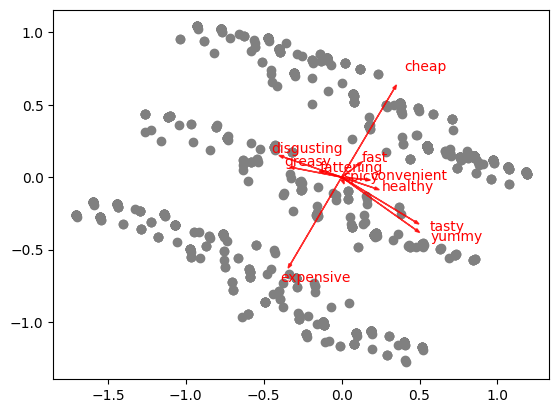

In [131]:
pca = PCA(n_components=2)
pcafitt = pca.fit_transform(a)

pcafitt.shape

plt.scatter(pcafitt[:,0],pcafitt[:,1],c='grey')

components = pca.components_.T
feature_names = a.columns

for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='red', head_width=0.02, alpha=0.8)
    plt.text(components[i, 0] * 1.2, components[i, 1] * 1.2, feature, color='red')

plt.show()

#### KMEANS

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import seaborn as sns

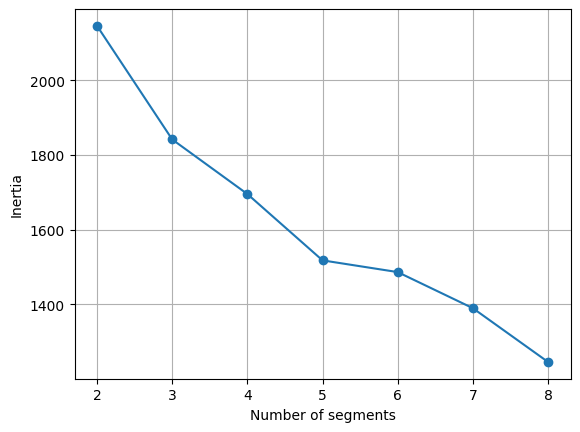

In [133]:
k_range = range(2, 9)
kmeans_models = {}
random_state = 7

for k in k_range:
    best_inertia = np.inf
    best_model = None
    for _ in range(10):
        model = KMeans(n_clusters=k, random_state=random_state, n_init='auto')
        model.fit(a)
        if model.inertia_ < best_inertia:
            best_inertia = model.inertia_
            best_model = model
    kmeans_models[k] = best_model

inertias = [model.inertia_ for model in kmeans_models.values()]
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_24956\1006945649.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ari_scores[k] for k in cluster_range], labels=cluster_range, patch_artist=True)


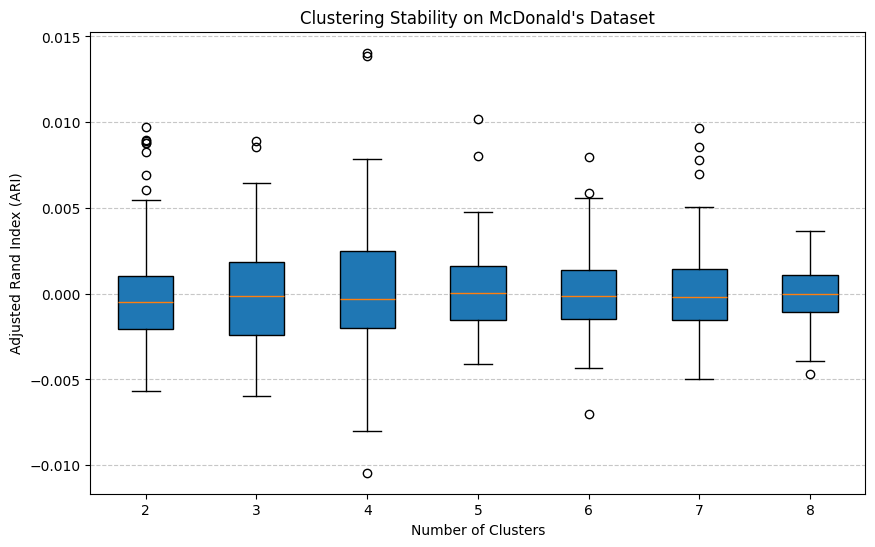

In [134]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

scaler = StandardScaler()
a_scaled = scaler.fit_transform(a)

num_bootstraps = 100
cluster_range = range(2, 9)
n_init = 10

ari_scores = {k: [] for k in cluster_range}

for i in range(num_bootstraps):
    sample = resample(a_scaled, replace=True, random_state=i)

    for k in cluster_range:
        kmeans_sample = KMeans(n_clusters=k, n_init=n_init, algorithm='lloyd', random_state=i)
        labels_sample = kmeans_sample.fit_predict(sample)

        kmeans_full = KMeans(n_clusters=k, n_init=n_init, algorithm='lloyd', random_state=i)
        labels_full = kmeans_full.fit_predict(a_scaled)

        ari = adjusted_rand_score(labels_full, labels_sample)
        ari_scores[k].append(ari)

plt.figure(figsize=(10, 6))
plt.boxplot([ari_scores[k] for k in cluster_range], labels=cluster_range, patch_artist=True)
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.title("Clustering Stability on McDonald's Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

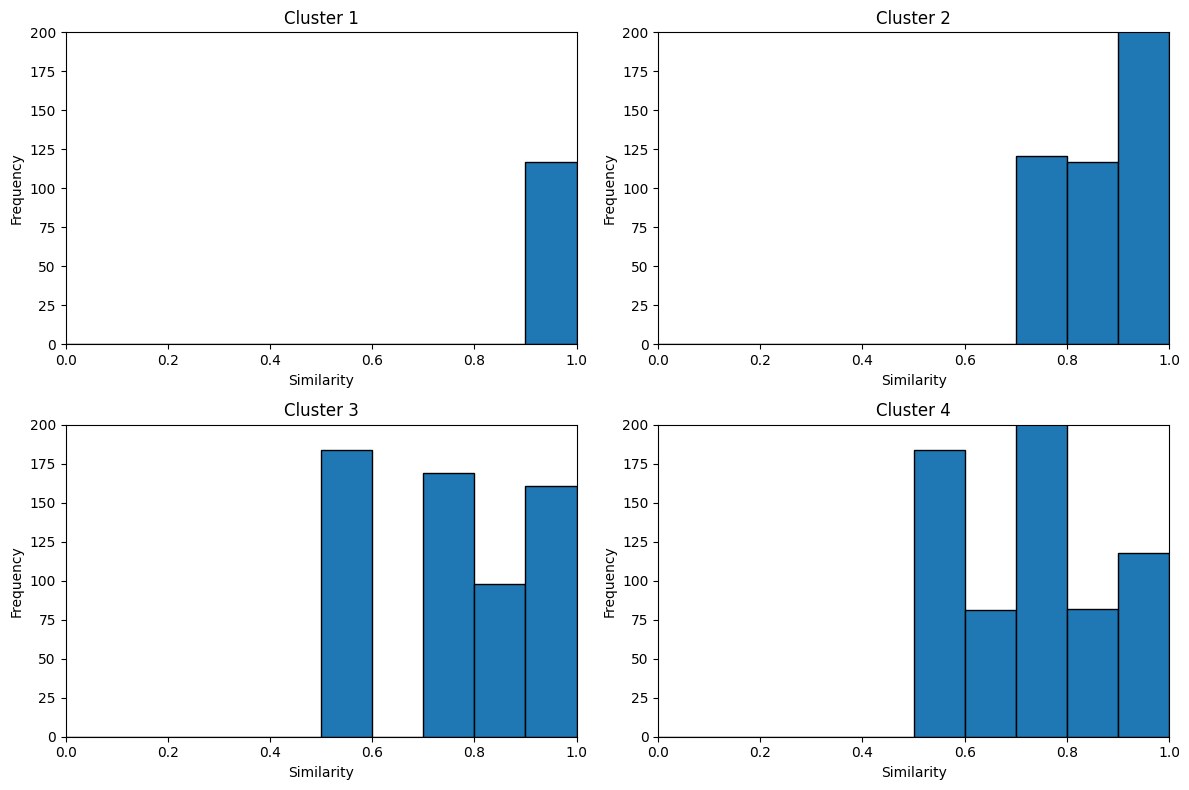

In [135]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

cluster_range = range(1, 9) 
model = {}  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(a)
    model[str(k)] = kmeans

similarity_range = (0, 1)
num_bins = 10
max_freq = 200

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for cluster_num in range(1, 5):
    cluster_labels = model[str(cluster_num)].predict(a)
    cluster_similarities = model[str(cluster_num)].transform(a).min(axis=1)
    
    row_idx = (cluster_num - 1) // 2
    col_idx = (cluster_num - 1) % 2

    axes[row_idx, col_idx].hist(cluster_similarities, bins=num_bins, range=similarity_range, edgecolor='black')
    axes[row_idx, col_idx].set_xlabel('Similarity')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Cluster {cluster_num}')

    axes[row_idx, col_idx].set_xlim(similarity_range)
    axes[row_idx, col_idx].set_ylim(0, max_freq)
    axes[row_idx, col_idx].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

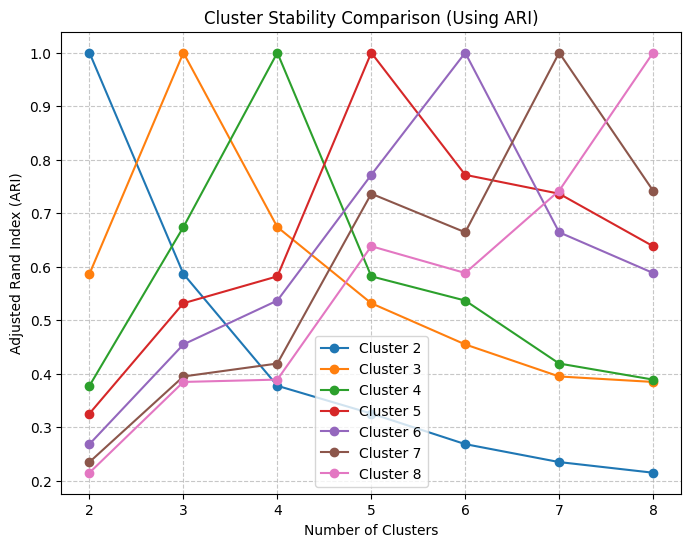

In [136]:
MD = (data.iloc[:, 0:11] == "Yes").astype(int)

np.random.seed(1234)

cluster_range = range(2, 9)
model = {} 

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD)
    model[str(k)] = kmeans

segment_stability = [model[str(k)].predict(MD) for k in cluster_range]

from sklearn.metrics import adjusted_rand_score

plt.figure(figsize=(8, 6))

for idx, k in enumerate(cluster_range):
    scores = [adjusted_rand_score(segment_stability[idx], labels) for labels in segment_stability]
    plt.plot(cluster_range, scores, marker='o', label=f'Cluster {k}')

plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Cluster Stability Comparison (Using ARI)')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


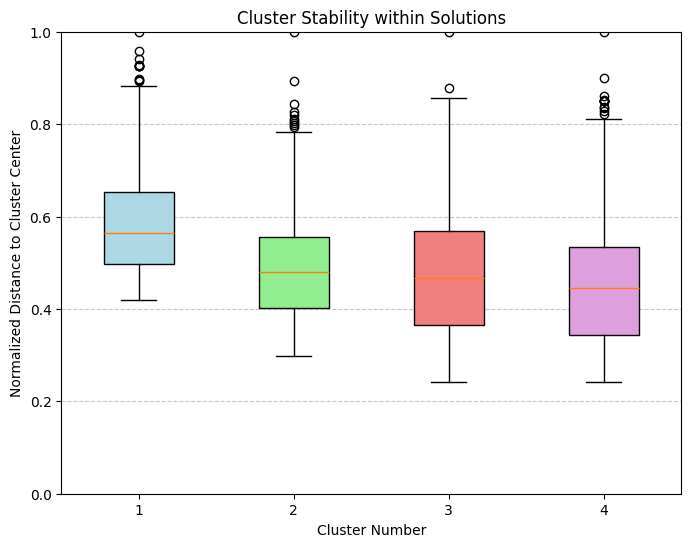

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)

cluster_range = range(1, 9)
km_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(a)
    km_models[str(k)] = kmeans

clusters_to_analyze = ["1", "2", "3", "4"]
cluster_labels = {}
cluster_similarities = {}

for cluster in clusters_to_analyze:
    cluster_labels[cluster] = km_models[cluster].predict(a)
    cluster_similarities[cluster] = km_models[cluster].transform(a).min(axis=1)

stability_scores = []
for cluster in clusters_to_analyze:
    similarities = cluster_similarities[cluster]
    normalized_similarities = similarities / np.max(similarities)
    stability_scores.append(normalized_similarities)

plt.figure(figsize=(8, 6))
box = plt.boxplot(stability_scores, whis=1.5, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel("Cluster Number")
plt.ylabel("Normalized Distance to Cluster Center")
plt.xticks(range(1, len(clusters_to_analyze) + 1), clusters_to_analyze)
plt.ylim(0, 1)
plt.title("Cluster Stability within Solutions")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Distributions

In [138]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import entropy

if not isinstance(a, pd.DataFrame):
    a = pd.DataFrame(a)

np.random.seed(1234)

cluster_range = range(2, 9)
model_metrics = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(a.values)
    
    iter_count = kmeans.n_iter_
    log_likelihood = -kmeans.inertia_ 
    n_samples, _ = a.shape

    aic_value = -2 * log_likelihood + 2 * k
    bic_value = -2 * log_likelihood + np.log(n_samples) * k

    cluster_labels = kmeans.labels_
    cluster_counts = np.bincount(cluster_labels)
    cluster_probs = cluster_counts / float(cluster_counts.sum())
    entropy_value = entropy(cluster_probs)
    icl_value = bic_value - entropy_value

    model_metrics.append((iter_count, True, k, k, log_likelihood, aic_value, bic_value, icl_value))

modelmdf = pd.DataFrame(model_metrics, columns=['Iterations', 'Converged', 'Clusters', 'Initial K','Log Likelihood', 'AIC', 'BIC', 'ICL'])

modelmdf

,Iterations,Converged,Clusters,Initial K,Log Likelihood,AIC,BIC,ICL
0,10,True,2,2,-2146.062044,4296.124088,4306.686859,4306.015908
1,5,True,3,3,-1896.330266,3798.660532,3814.504689,3813.529671
2,9,True,4,4,-1603.913802,3215.827604,3236.953147,3235.627738
3,9,True,5,5,-1502.697153,3015.394306,3041.801234,3040.267284
4,7,True,6,6,-1348.665399,2709.330799,2741.019113,2739.277954
5,10,True,7,7,-1249.233890,2512.467780,2549.437480,2547.530062
6,9,True,8,8,-1203.646165,2423.292330,2465.543415,2463.533662


In [139]:
modelmdf.keys()

Index(['Iterations', 'Converged', 'Clusters', 'Initial K', 'Log Likelihood',
       'AIC', 'BIC', 'ICL'],
      dtype='object')

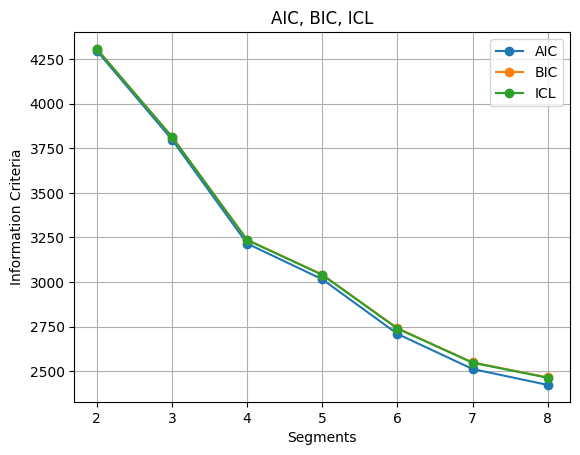

In [140]:
segment_numbers = modelmdf["Clusters"]
AIC_values = modelmdf["AIC"]
BIC_values = modelmdf["BIC"]
ICL_values = modelmdf["ICL"]

plt.plot(segment_numbers, AIC_values, marker='o', label='AIC')
plt.plot(segment_numbers, BIC_values, marker='o', label='BIC')
plt.plot(segment_numbers, ICL_values, marker='o', label='ICL')

plt.xlabel('Segments')
plt.ylabel('Information Criteria')
plt.title('AIC, BIC, ICL')
plt.legend()
plt.grid(True)

plt.show()

In [141]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd

MD = a.copy()
num_clusters = 4

kmeans_model = KMeans(n_clusters=num_clusters, random_state=1234)
kmeans_model.fit(MD)
kmeans_labels = kmeans_model.predict(MD)

gmm_model = GaussianMixture(n_components=num_clusters, random_state=1234)
gmm_model.fit(MD)
gmm_labels = gmm_model.predict(MD)

clustering_results = pd.DataFrame({
    'KMeans_Labels': kmeans_labels,
    'GMM_Labels': gmm_labels
})

subset_MD = MD[clustering_results['GMM_Labels'] == 3]

subset_kmeans = KMeans(n_clusters=num_clusters, random_state=1234)
subset_kmeans.fit(subset_MD)
subset_labels = subset_kmeans.predict(subset_MD)

subset_results = pd.DataFrame({
    'KMeans_Subset_Labels': subset_labels,
    'GMM_Subset': 3
}, index=subset_MD.index)

print("KMeans vs GMM Labels:")
print(pd.crosstab(clustering_results['KMeans_Labels'], clustering_results['GMM_Labels']))

print("\nKMeans vs Subset KMeans Labels (GMM Label 3 only):")
print(pd.crosstab(clustering_results.loc[subset_results.index, 'KMeans_Labels'], subset_results['KMeans_Subset_Labels']))


KMeans vs GMM Labels:
GMM_Labels       0    1    2    3
KMeans_Labels                    
0              546    0    1   33
1                0  213   11    4
2               46    3  265    8
3               29   38    0  256

KMeans vs Subset KMeans Labels (GMM Label 3 only):
KMeans_Subset_Labels    0   1   2   3
KMeans_Labels                        
0                       0  22   3   8
1                       3   1   0   0
2                       0   8   0   0
3                     118   6  72  60


In [142]:
from sklearn.mixture import GaussianMixture

gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD)
log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4, random_state=1234)
gmm_m4.fit(MD)
log_likelihood_m4 = gmm_m4.score(MD)

print(f"Log-likelihood for MD.m4a: {log_likelihood_m4a}")
print(f"Log-likelihood for MD.m4: {log_likelihood_m4}")

Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 9.456781748071885


### REGRESSION

In [143]:
data['Like'].value_counts()[::-1]


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64

In [144]:
# Convert 'Like' to numeric (category codes), then reverse the scale
data['Like_n'] = 6 - data['Like'].astype('category').cat.codes - 1

# Show frequency table (like table() in R)
print(data['Like_n'].value_counts().sort_index())

Like_n
-5    143
-4    152
-3    169
-2     71
-1     73
 0     59
 1     58
 2    160
 3    229
 4    187
 5    152
Name: count, dtype: int64


In [145]:
# Build the formula string for statsmodels or patsy
features = '+'.join(data.columns[:11])  # Assuming columns 0 to 10 are predictors
formula = f'Like_n ~ {features}'

print(formula)


Like_n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


In [146]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf

data_binary = (data.iloc[:, :11] == "Yes").astype(int)

# Use this binary data for GMM
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
clusters = gmm.fit_predict(data_binary)

# Save cluster assignments
data['Cluster'] = clusters

# Fit separate regressions for each cluster
models = {}
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    model = smf.ols(formula=formula, data=cluster_data).fit()
    models[cluster_id] = model
    print(f"\nCluster {cluster_id} summary:\n")
    print(model.summary())



Cluster 0 summary:

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.650
Date:                Sun, 06 Apr 2025   Prob (F-statistic):            0.00704
Time:                        12:42:28   Log-Likelihood:                -2586.4
No. Observations:                 985   AIC:                             5191.
Df Residuals:                     976   BIC:                             5235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          

In [147]:
from sklearn.mixture import GaussianMixture

# Convert Yes/No predictors to binary
X_binary = (data.iloc[:, :11] == "Yes").astype(int)

# Fit Gaussian Mixture on binary predictors
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
data['Cluster'] = gmm.fit_predict(X_binary)

# Show cluster sizes like in R
cluster_sizes = data['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
for cluster_id, count in cluster_sizes.items():
    print(f"{cluster_id + 1} {count}")


Cluster sizes:
1 985
2 468


In [148]:
import statsmodels.formula.api as smf

# Create the regression formula
features = '+'.join(data.columns[:11])
formula = f'Like_n ~ {features}'

# Refit regression models per cluster (just like refit in R)
models = {}
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    model = smf.ols(formula=formula, data=cluster_data).fit()
    models[cluster_id] = model
    
    print(f"\n$Comp.{cluster_id + 1}\n")
    print(model.summary())



$Comp.1

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.650
Date:                Sun, 06 Apr 2025   Prob (F-statistic):            0.00704
Time:                        12:42:28   Log-Likelihood:                -2586.4
No. Observations:                 985   AIC:                             5191.
Df Residuals:                     976   BIC:                             5235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5538   

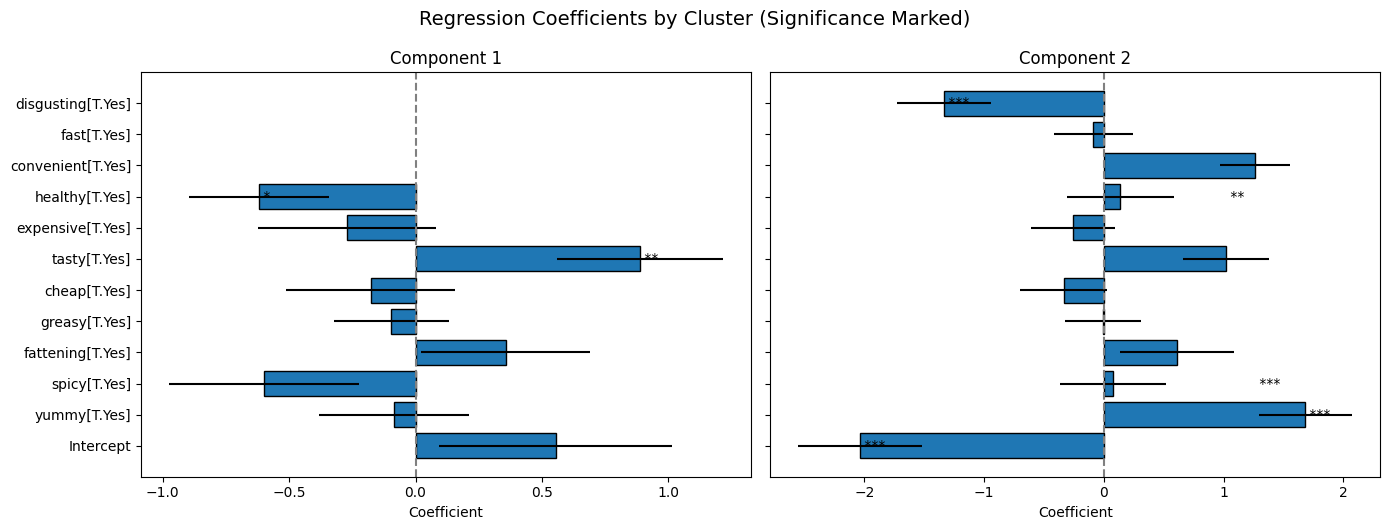

In [149]:
import matplotlib.pyplot as plt

# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(14, 5), sharey=True)
if len(models) == 1:
    axes = [axes]  # Ensure axes is iterable

for i, (cluster_id, model) in enumerate(models.items()):
    coefs = model.params
    errors = model.bse
    pvalues = model.pvalues

    # Plot with error bars
    axes[i].barh(coefs.index, coefs.values, xerr=errors, edgecolor='black')

    # Add significance stars
    for y_pos, pval in enumerate(pvalues):
        star = ""
        if pval < 0.001:
            star = "***"
        elif pval < 0.01:
            star = "**"
        elif pval < 0.05:
            star = "*"
        elif pval < 0.1:
            star = "."
        axes[i].text(coefs.values[y_pos], y_pos, f" {star}", va='center')

    axes[i].axvline(0, color='gray', linestyle='--')
    axes[i].set_title(f"Component {cluster_id + 1}")
    axes[i].set_xlabel("Coefficient")

plt.tight_layout()
plt.suptitle("Regression Coefficients by Cluster (Significance Marked)", y=1.05, fontsize=14)
plt.show()


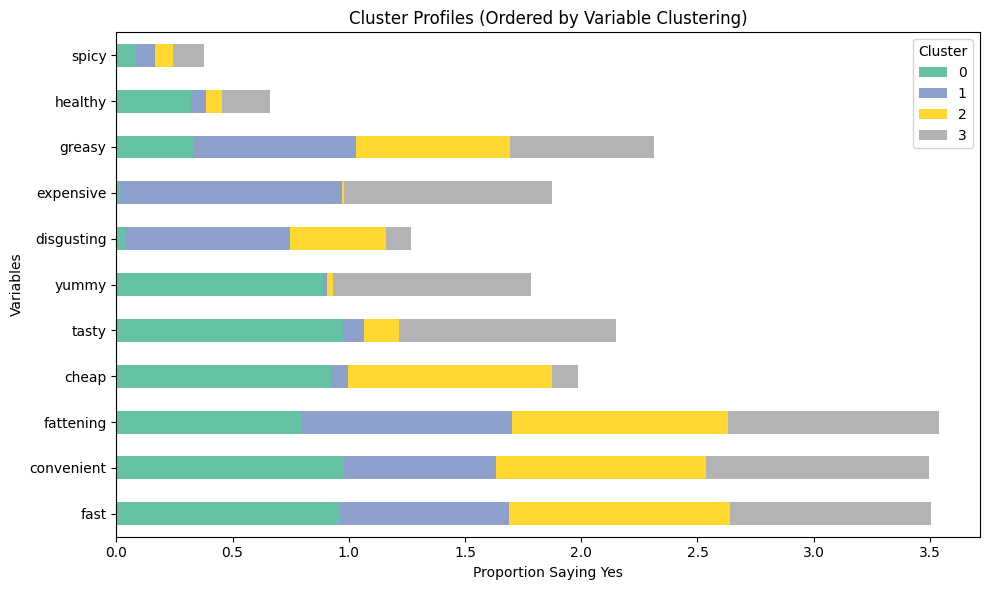

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Step 1: Use your binary data
MD_x = (data.iloc[:, :11] == "Yes").astype(int)

# Step 2: Hierarchical clustering of variables (columns)
linked = linkage(MD_x.T, method='ward')
dendro = dendrogram(linked, no_plot=True)
ordered_cols = [MD_x.columns[i] for i in dendro['leaves'][::-1]]  # reversed order like rev()

# Step 3: Fit KMeans with k=4 clusters on observations
kmeans_k4 = KMeans(n_clusters=4, random_state=1234)
cluster_labels = kmeans_k4.fit_predict(MD_x)

# Step 4: Create a DataFrame of cluster means by variable
MD_k4_means = pd.DataFrame(MD_x)
MD_k4_means['Cluster'] = cluster_labels
cluster_profile = MD_k4_means.groupby('Cluster').mean()[ordered_cols].T

# Step 5: Plot like a barchart
cluster_profile.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set2')
plt.xlabel("Proportion Saying Yes")
plt.ylabel("Variables")
plt.title("Cluster Profiles (Ordered by Variable Clustering)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


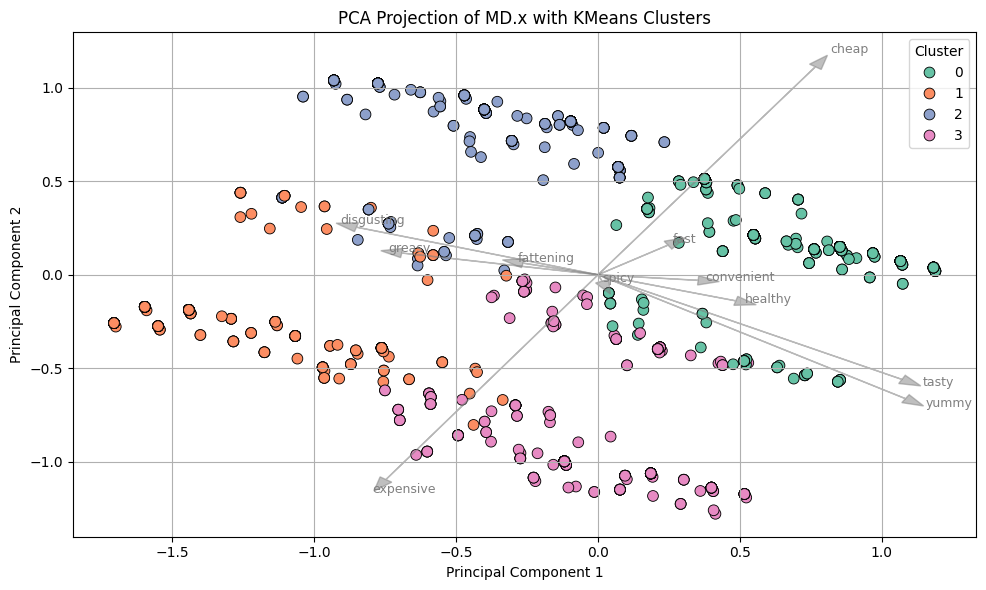

In [151]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Binary conversion of the data
MD_x = (data.iloc[:, :11] == "Yes").astype(int)

# Apply PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Fit KMeans (MD.k4 equivalent)
kmeans = KMeans(n_clusters=4, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot the PCA projection with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=60, edgecolor='black')
plt.title("PCA Projection of MD.x with KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot variable loadings like projAxes(MD.pca)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(MD_x.columns):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='gray', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='gray', fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

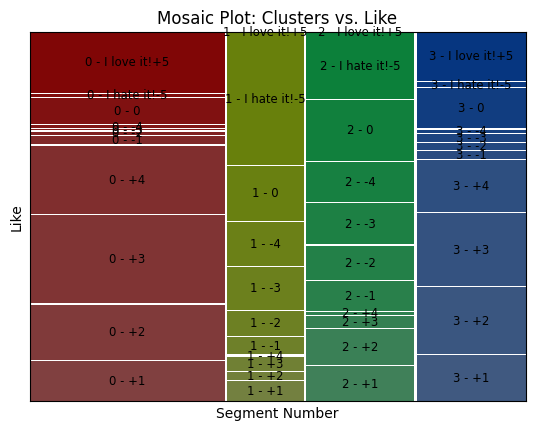

In [152]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'cluster_labels' is from KMeans (MD.k4 equivalent)
# And 'data' has the 'Like' column

# Create a contingency table (cross-tabulation)
cross_tab = pd.crosstab(cluster_labels, data['Like'])

# Convert to dictionary format for mosaic plot
mosaic_data = {(str(k), str(like)): v for k, row in cross_tab.iterrows() for like, v in row.items()}

# Plot the mosaic with counts displayed
plt.figure(figsize=(10, 6))

# Modify labelizer to show counts within each box
mosaic(mosaic_data, title="Mosaic Plot: Clusters vs. Like", labelizer=lambda k: f'{k[0]} - {k[1]}', axes_label=False)

# Add axis labels and title
plt.xlabel("Segment Number")
plt.ylabel("Like")
plt.title("Mosaic Plot: Clusters vs. Like")

plt.show()


In [153]:
from sklearn.preprocessing import LabelEncoder

data['VisitFrequencyNumeric'] = LabelEncoder().fit_transform(data['VisitFrequency'])

X = data[['VisitFrequencyNumeric', 'Like_n']].dropna()

# Fit the KMeans model
kmeans.fit(X)

# Get the cluster labels
k4 = kmeans.labels_


In [154]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[['VisitFrequencyNumeric', 'Like_n']] = imputer.fit_transform(data[['VisitFrequencyNumeric', 'Like_n']])

# Now, you can perform K-Means clustering
X = data[['VisitFrequencyNumeric', 'Like_n']]
kmeans.fit(X)

# Get the cluster labels
k4 = kmeans.labels_


In [155]:
# 1. Compute the mean of VisitFrequency for each cluster
visit = data.groupby(k4)['VisitFrequencyNumeric'].mean()
print("Visit Frequency Mean by Cluster:")
print(visit)

# 2. Compute the mean of Like.n for each cluster
like = data.groupby(k4)['Like_n'].mean()
print("\nLike.n Mean by Cluster:")
print(like)

# 3. Compute the proportion of females in each cluster
# First, convert 'Gender' to numeric: Female = 1, Male = 0
data['Gender_numeric'] = (data['Gender'] == 'Female').astype(int)

# Then compute the mean (proportion of females) by cluster
female = data.groupby(k4)['Gender_numeric'].mean()
print("\nProportion of Females by Cluster:")
print(female)

Visit Frequency Mean by Cluster:
0    3.665000
1    2.631304
2    3.591304
3    0.112903
Name: VisitFrequencyNumeric, dtype: float64

Like.n Mean by Cluster:
0    1.897500
1   -3.499130
2    4.452174
3    3.052419
Name: Like_n, dtype: float64

Proportion of Females by Cluster:
0    0.567500
1    0.526957
2    0.500000
3    0.576613
Name: Gender_numeric, dtype: float64


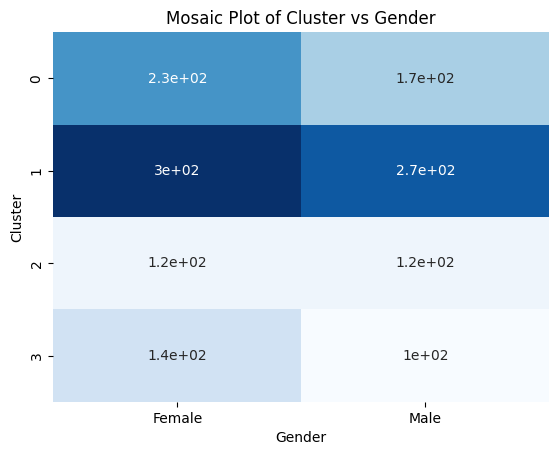

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'k4' contains the cluster labels and 'Gender' is a column in the 'mcdonalds' DataFrame
# Create a cross-tabulation table between the cluster labels and Gender
gender_cluster_table = pd.crosstab(k4, data['Gender'])

# Plotting the mosaic plot using seaborn or matplotlib
sns.heatmap(gender_cluster_table, annot=True, cmap='Blues', cbar=False)

plt.title('Mosaic Plot of Cluster vs Gender')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()


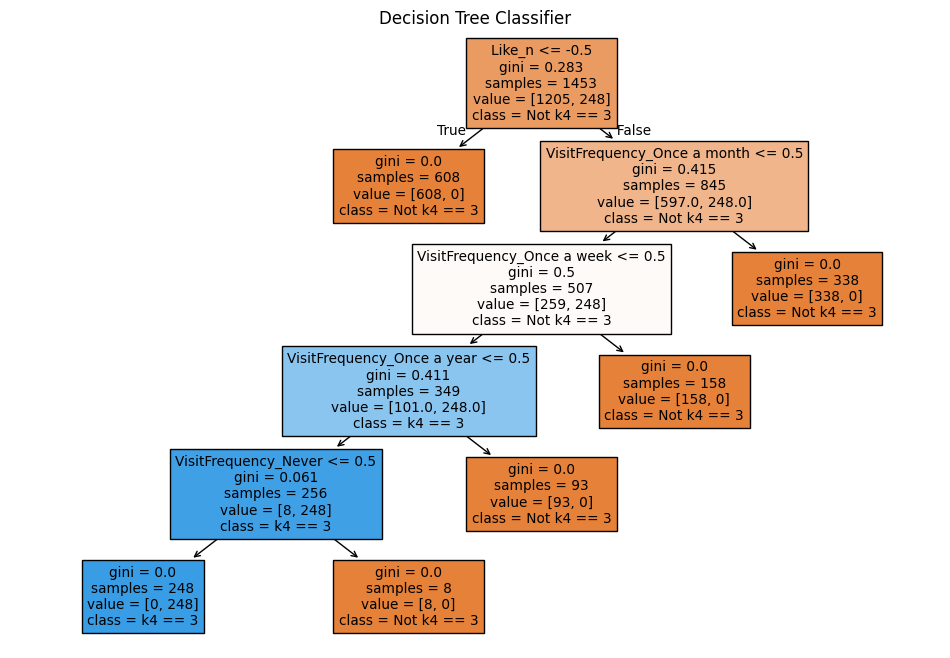

In [157]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'k4', 'Like.n', 'Age', 'VisitFrequency', 'Gender' are columns in the 'data' DataFrame
# Create a binary target variable 'target' indicating if k4 is 3 or not
data['target'] = (k4 == 3).astype(int)

# Prepare the feature set
X = data[['Like_n', 'Age', 'VisitFrequency', 'Gender']]

# Handle categorical features (e.g., 'Gender') using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, data['target'])

# Plot the tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['Not k4 == 3', 'k4 == 3'], filled=True)
plt.title('Decision Tree Classifier')
plt.show()


In [158]:
# Calculate the mean of 'Like.n' for each cluster
like = data.groupby(k4)['Like_n'].mean()
print("Like_n Mean by Cluster:")
print(like)

Like_n Mean by Cluster:
0    1.897500
1   -3.499130
2    4.452174
3    3.052419
Name: Like_n, dtype: float64


In [159]:
# Convert Gender to numeric (Female = 1, Male = 0)
data['Gender_numeric'] = (data['Gender'] == 'Female').astype(int)

# Calculate the proportion of females for each cluster
female = data.groupby(k4)['Gender_numeric'].mean()
print("Proportion of Females by Cluster:")
print(female)


Proportion of Females by Cluster:
0    0.567500
1    0.526957
2    0.500000
3    0.576613
Name: Gender_numeric, dtype: float64


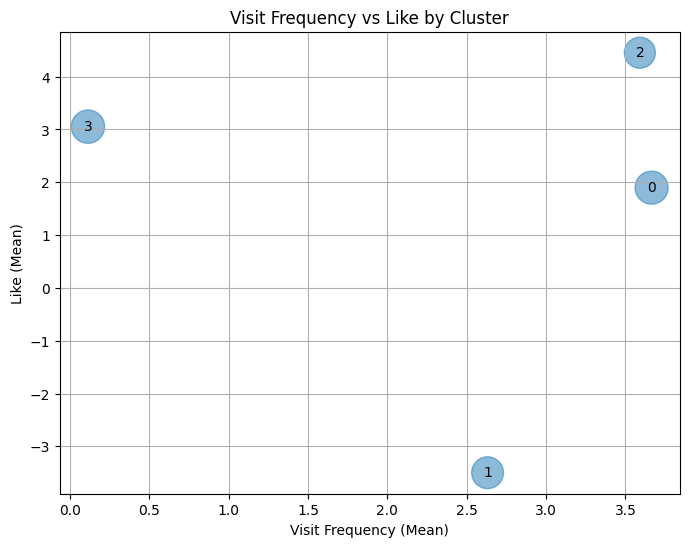

In [160]:
visit_values = visit.values
like_values = like.values
female_values = female.values
labels = visit.index  # Cluster numbers: [0]

plt.figure(figsize=(8, 6))
plt.scatter(visit_values, like_values, s=[f * 1000 for f in female_values], alpha=0.5)  # Size scaled by female

# Add labels
for i, label in enumerate(labels):
    plt.text(visit_values[i], like_values[i], str(label), ha='center', va='center')

# Add labels and title
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')
plt.title('Visit Frequency vs Like by Cluster')
plt.grid(True)

# Show plot
plt.show()